<a href="https://colab.research.google.com/github/lukasdekanovsky/Become_PythonDeveloper_AI/blob/main/X_STROJOV%C3%89_U%C4%8CEN%C3%8D_(CL)_Bin%C3%A1rn%C3%AD_klasifikace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Konvoluční neuronová síť** - binární klasifikace

Pracujeme s IMDS datovou množinou obsahující 50 000 vysoce polarizovaných recenzí na pozitivní a negativní

Datová množina IMDS je balená s framworkem KERAS
* Sekvence slov byly předběžně zpracovány do posloupnosti čísel, kde každé číslo znamená slovo ve slovníku

# **Načtení datové množiny**
* **from Keras.datasets import imbd**
* **train_data, train_labels),(test_data, test_labels) = imbd.load_data(num_words=10000)**

* argumen num_words znamená, že ve trénovacích datech budeme mít pouze 10 000 nejčasteji se vyskytujících slov
* řídce vyskytující se slova budou vyřazena

In [ ]:
import tensorflow as tf

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


# **Prohlédnutí dat**

In [ ]:
train_data[0] #seznam indexů 0-9999

In [ ]:
train_labels[0] #získáváme 1 nebo 0 - binární pozitivní nebo negativní

In [ ]:
max([max(sequence) for sequence in train_data]) #9999 = maximální index

# **Zpětné dekódování indexu na anglická slova**

In [ ]:
from keras.datasets import imdb

* funkce **.get_word_index()** aplikovaná na imdb dataset vrátí slovník anglických slov s přislušným indexem

In [ ]:
slovnik = imdb.get_word_index()
                                    # print(slovnik)
                                    #      {'fawn': 34701,
                                    #      'tsukino': 52006,
                                    #      'nunnery': 52007,
                                    #      'sonja': 16816,
                                    #      'vani': 63951,...... atd}
reverzni_slovnik = dict([(value, key) for (key,value) in slovnik.items()])
                                    # print(reverzni_slovnik)  {34701: 'fawn', 52006: 'tsukino', 52007: 'nunnery', 16816: ......
dekodovani_review = " ".join([reverzni_slovnik.get(i-3,"?") for i in train_data[0]])
dekodovani_review
                                    # ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all

# **Příprava dat**

Do neuronové sítě nemůžeme posílat seznamy celých čísel, musíme změnit seznamy na tenzory
* 1) Uložit naše seznamy tak aby měly všechny stejnou délku a změnit je na celočíselny tenzor pomocí tvaru (samples, word_indices) a poté použijeme jako prvni vrstvu v síti, první vrstva **Embedding**
* 2) Zakodujeme seznamy tak, že se změní na vektory nul a jedniček --> [3,5] věta by se přeložila do 10 000 rozměrného vektoru který by obsahoval nuly s vyjimkou indexu na 3 a 5, poté můžeme použít jako prvni vrstvu **Dense**

**2) Postup převedení celočíselné posloupnosti do binární matice**

In [ ]:
import numpy as np

In [ ]:
def vektorizace_sekvence(sekvence, dimensions=10000):
  vysledek = np.zeros((len(sekvence), dimensions)) #vytvoří se vynulovaná matice dimenze 10 000
  for i, sekvence in enumerate(sekvence):
    vysledek[i, sekvence] = 1.                     #Nastaví zadaný index vektoru vysledek[i] na 1
  return vysledek

In [ ]:
x_train = vektorizace_sekvence(train_data)
x_test = vektorizace_sekvence(test_data)

Vektorizujeme rovněž označení tříd

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Zobrazme si příklad vstupních dat zprocesovaných pro neuronovou síť

In [ ]:
print(x_train)
print(y_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[1. 0. 0. ... 0. 1. 0.]


# **Tvorba sítě, modelu a trénink**

Vstupními daty jsou vektory a označení tříd jsou skaláry

Zadefinujeme si model:

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


Kompilace modelu

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


Aby bylo možné během trénování sledovat správnost modelu na datech, která předtím nebyla viděna, vytvoříme validační množinu oddělením prvních 10 000 příkladů z původních trénovacích dat

In [ ]:
x_val = x_train[:10000]                    # x = recenze y = 0/1 pozitivní negativní
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* Model budeme trénovat pro 20 epoch v minidávkách 512 příkladů
* Současně sledujeme správnost na 10 000 příkladech které jsme si oddělili

Volání **model.fit()** vrací objekt History, tento objekt má prvek history, což je slovník obsahující údaje o všem, co se stalo během trénování.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))



Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5055 - accuracy: 0.7855 - val_loss: 0.3862 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2949 - accuracy: 0.9017 - val_loss: 0.3483 - val_accuracy: 0.8527
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2112 - accuracy: 0.9298 - val_loss: 0.2794 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1711 - accuracy: 0.9421 - val_loss: 0.2746 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1341 - accuracy: 0.9567 - val_loss: 0.2904 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1151 - accuracy: 0.9624 - val_loss: 0.2985 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0892 - accuracy: 0.9749 - val_loss: 0.3151 - val_accuracy: 0.8829
Epoch 8/20
30

Zobrazíme si údaje v prvku **history**

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# **Vyhodnocení učení**

* Můžeme si nechat zobrazit z prvku history trénovací a validační ztráty
* Nebo druhá možnost správnost trénování a validace

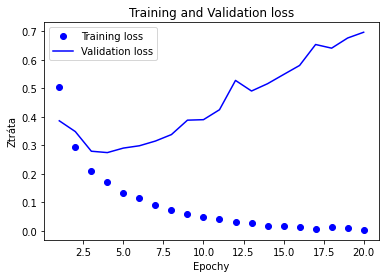

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochy")
plt.ylabel("Ztráta")
plt.legend()

plt.show()

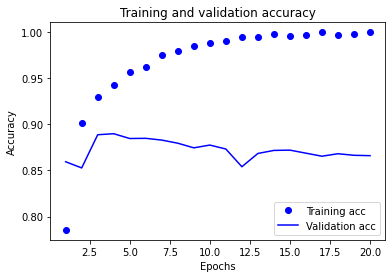

In [ ]:
plt.clf() #vyčistí obrázek

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# **Reoptimalizace modelu**

* Jak je vidět z validační acc, model je přeučený, vrcholý někde u 4 epochy, provedeme proto úpravu modelu

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 2s 53ms/step - loss: 0.5201 - accuracy: 0.7804 - val_loss: 0.3958 - val_accuracy: 0.8647
Epoch 2/4
30/30 [==============================] - 1s 38ms/step - loss: 0.3118 - accuracy: 0.9036 - val_loss: 0.3599 - val_accuracy: 0.8485
Epoch 3/4
30/30 [==============================] - 1s 38ms/step - loss: 0.2274 - accuracy: 0.9293 - val_loss: 0.2795 - val_accuracy: 0.8909
Epoch 4/4
30/30 [==============================] - 1s 38ms/step - loss: 0.1774 - accuracy: 0.9439 - val_loss: 0.2838 - val_accuracy: 0.8862


# **Validace modelu na testovacích datech**

Validace modelu pomocí příkazu **model.evaluate(testovací x, testovací y)**

In [ ]:
results = model.evaluate(x_test, y_test)
results
# Výsledkem je správnost 87,7 % správnost predikce

782/782 [==============================] - 2s 3ms/step - loss: 0.3049 - accuracy: 0.8768


[0.304902583360672, 0.8768399953842163]

# **Používání naučené neuronové sítě pro generování predikcí pro nová data!!!**

Pomocí **model.predict(data)**

In [ ]:
model.predict(x_test)